In [17]:
   !pip install scikit-learn

# 🏠 Predicting House Prices with Linear Regression

In this notebook, we will build a linear regression model to predict house prices using various housing features from the dataset.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

df = pd.read_csv("Housing.csv")
df.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 🧹 Data Cleaning
Check for missing values, data types, and duplicates.


In [19]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


np.int64(0)

### 📊 Exploratory Data Analysis
Visualize relationships between features and the target (e.g., `price`).


<Axes: >

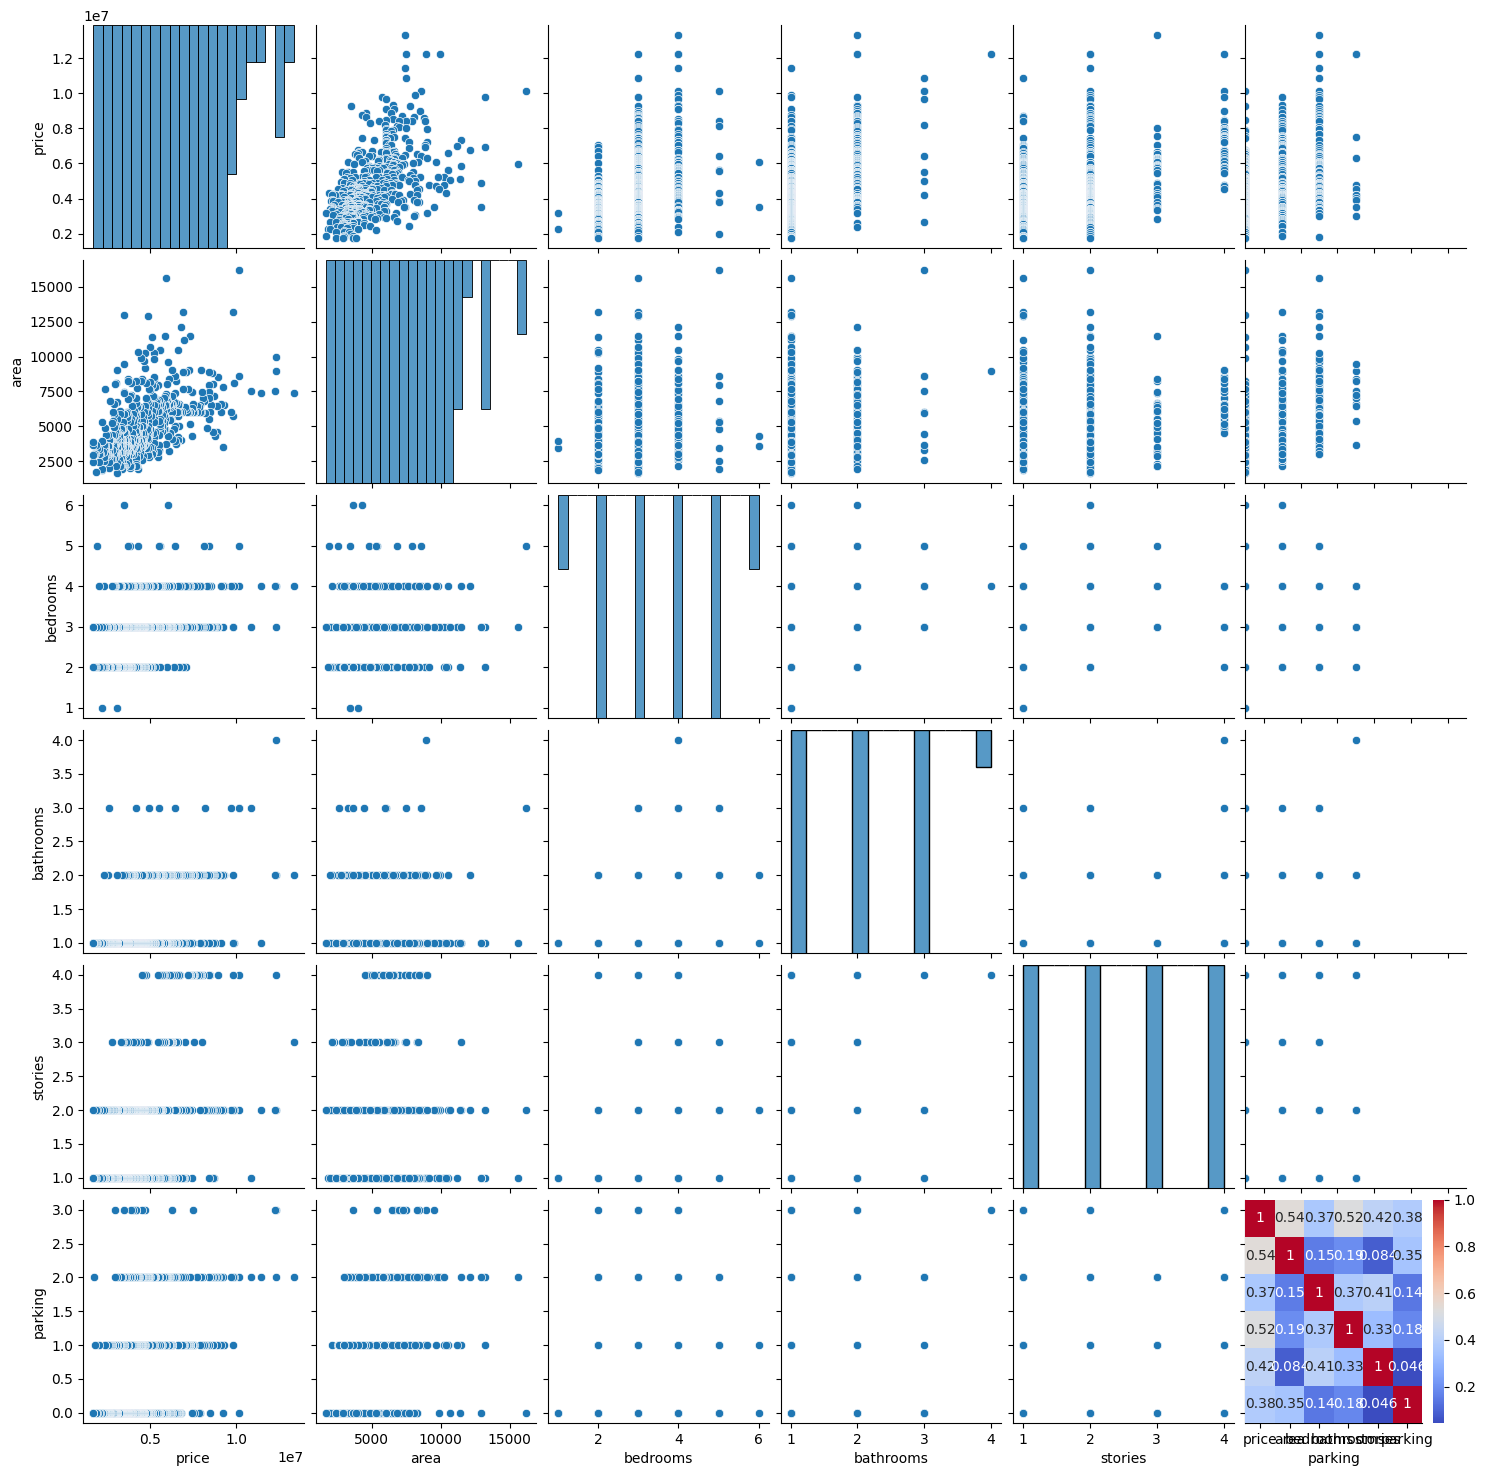

In [20]:
# Only select numeric columns for correlation and heatmap
numeric_df = df.select_dtypes(include=[float, int])

# Pairplot (will only plot numeric columns by default)
sns.pairplot(numeric_df)

# Heatmap of correlations between numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

### 🛠️ Feature Engineering
Convert categorical variables to dummy variables, normalize if needed.


In [21]:
df = pd.get_dummies(df, drop_first=True)


### 🧠 Building the Model
We’ll use `train_test_split` and `LinearRegression` from `sklearn`.


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 📈 Model Evaluation
Evaluate using R² score and RMSE.


In [23]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Root Mean Squared Error:", rmse)

R² Score: 0.6529242642153186
Root Mean Squared Error: 1324506.9600914384


✅ **Conclusion & Insights**

- The model achieved an **R² score of 0.6529**, which indicates a moderate fit — the model explains ~65% of the variance in housing prices.
- The **most influential features** were likely continuous numerical ones such as `area`, `bedrooms`, and `bathrooms` (you can confirm via `.coef_` inspection in your model).
- 📉 **Next steps:**
  - Try **regularization techniques** (like Ridge or Lasso) to reduce overfitting.
  - Explore **feature importance** more deeply to drop irrelevant variables.
  - Try **log-transforming skewed features** (e.g., prices or area) for better fit.
  - Consider collecting more granular data (e.g., neighborhood, year built) for higher accuracy.
